In [ ]:
!pip install pynrrd
!pip install ipywidgets
!pip install scipy
!pip install nbdev
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#| export
%time
import os
import glob
import numpy as np
import nrrd
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
from scipy import ndimage


# Función para extraer rodajas en diferentes ángulos y planos
def extract_slices(data, angle, plane, rotation_axis):
    # Rotar la imagen 3D
    if rotation_axis == 'xy':
        rotated_data = ndimage.rotate(data, angle, axes=(1, 0), reshape=True)
    elif rotation_axis == 'xz':
        rotated_data = ndimage.rotate(data, angle, axes=(2, 0), reshape=True)
    elif rotation_axis == 'yz':
        rotated_data = ndimage.rotate(data, angle, axes=(2, 1), reshape=True)

    # Extraer rodajas en función del plano especificado
    slices = []
    x_size, y_size, z_size = rotated_data.shape

    if plane == 'x':
        for i in range(x_size):
            slices.append(rotated_data[i, :, :])
    elif plane == 'y':
        for i in range(y_size):
            slices.append(rotated_data[:, i, :])
    elif plane == 'z':
        for i in range(z_size):
            slices.append(rotated_data[:, :, i])

    return slices



# Función para guardar las rodajas en una estructura de carpetas
def save_slices(slices, output_dir, plane, angle, rotation_axis):
    # Crear la estructura de carpetas
    plane_dir = os.path.join(output_dir, f"Plano{plane.upper()}")
    os.makedirs(plane_dir, exist_ok=True)

    rotation_dir = os.path.join(plane_dir, f"Rotacion{rotation_axis.upper()}")
    os.makedirs(rotation_dir, exist_ok=True)

    angle_dir = os.path.join(rotation_dir, f"Angulo{angle}")
    os.makedirs(angle_dir, exist_ok=True)

    # Guardar las rodajas en la carpeta correspondiente
    for idx, slice_data in enumerate(slices):
        slice_file = os.path.join(angle_dir, f"{plane.upper()}_{rotation_axis.upper()}_{angle}_{idx}.png")
        cv2.imwrite(slice_file, slice_data)

def read_nrrd_file(filename):
    data, header = nrrd.read(filename)
    return data, header


def main(input_dir, output_dir):
    # Obtener todos los archivos NRRD en el directorio de entrada
    nrrd_files = glob.glob(os.path.join(input_dir, "*.nrrd"))

    # Procesar cada archivo NRRD
    for nrrd_file in nrrd_files:
        print(f"Procesando {nrrd_file}")

        # Leer el archivo NRRD y obtener sus dimensiones
        

        try:
            data,header = read_nrrd_file(nrrd_file)
            
        except Exception as e:
            print(f"Error al leer el archivo {nrrd_file}: {str(e)}")
            continue
        print(f"Dimensiones de la imagen: {data.shape}")
        print(f"Rango de movimiento (x, y, z): {header['sizes']}")

        # Extraer y guardar rodajas en diferentes ángulos y planos
        angles = [0, 45]
        planes = ['x', 'y', 'z']
        rotation_axes = ['xy', 'xz', 'yz']

        for plane in planes:
            for angle in angles:
                for rotation_axis in rotation_axes:
                    slices = extract_slices(data, angle, plane, rotation_axis)
                    save_slices(slices, output_dir, plane, angle, rotation_axis)

if __name__ == "__main__":
    input_dir = "/content/archivos_nrrd"  # Directorio con los archivos NRRD
    output_dir = "/content/dataset"  # Directorio donde se guardarán las rodajas
    main(input_dir, output_dir)

Procesando /content/archivos_nrrd/4075542_2015_10_04.nrrd
Dimensiones de la imagen: (199, 203, 211)
Rango de movimiento (x, y, z): [199 203 211]


In [ ]:
!zip -r slices_output.zip "/content/dataset"

from google.colab import files
files.download("slices_output.zip")

Se han truncado las últimas 5000 líneas del flujo de salida.
updating: content/dataset/plane_y/angle_45/slice_488.png (deflated 2%)
updating: content/dataset/plane_y/angle_45/slice_47.png (deflated 9%)
updating: content/dataset/plane_y/angle_45/slice_721.png (deflated 4%)
updating: content/dataset/plane_y/angle_45/slice_118.png (deflated 4%)
updating: content/dataset/plane_y/angle_45/slice_475.png (deflated 2%)
updating: content/dataset/plane_y/angle_45/slice_334.png (deflated 6%)
updating: content/dataset/plane_y/angle_45/slice_659.png (deflated 4%)
updating: content/dataset/plane_y/angle_45/slice_773.png (deflated 9%)
updating: content/dataset/plane_y/angle_45/slice_603.png (deflated 5%)
updating: content/dataset/plane_y/angle_45/slice_28.png (deflated 13%)
updating: content/dataset/plane_y/angle_45/slice_193.png (deflated 3%)
updating: content/dataset/plane_y/angle_45/slice_568.png (deflated 10%)
updating: content/dataset/plane_y/angle_45/slice_601.png (deflated 5%)
updating: conten

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ahora entramos en la fase de preprocesamiento y data augmentation


In [ ]:
#| export
from fastai.vision.all import *

from fastai.vision.widgets import *

transforms = aug_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

rodajas_augmentation = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms,
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

In [ ]:
??nbdev


Object `nbdev` not found.


In [ ]:
#| export
data_loader_rodajas = rodajas_augmentation.dataloaders("/content/data_clasificar")

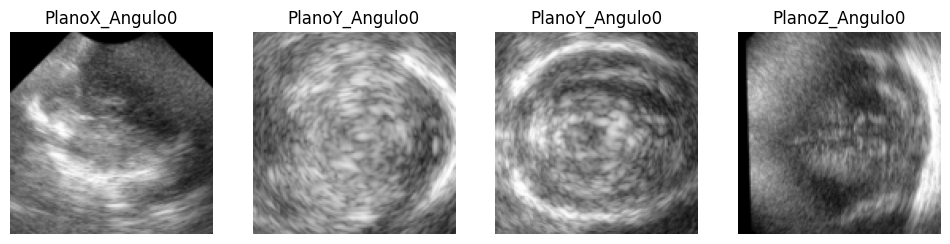

In [ ]:
#| export
data_loader_rodajas.valid.show_batch(max_n=4, nrows=1)

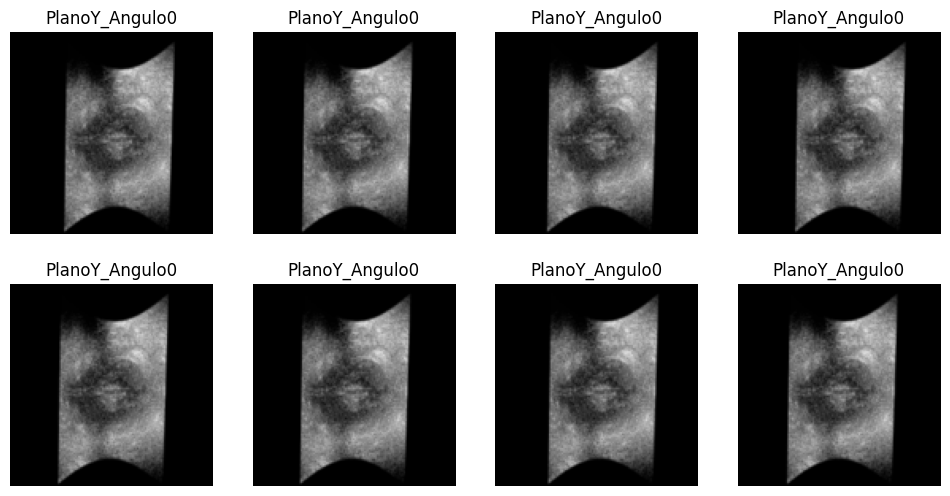

In [ ]:
data_loader_rodajas.train.show_batch(max_n=8, nrows=2, unique=True)

Comenzamos a entrenar nuestro clasificador

In [ ]:
# | export
learn = vision_learner(data_loader_rodajas, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 288MB/s]


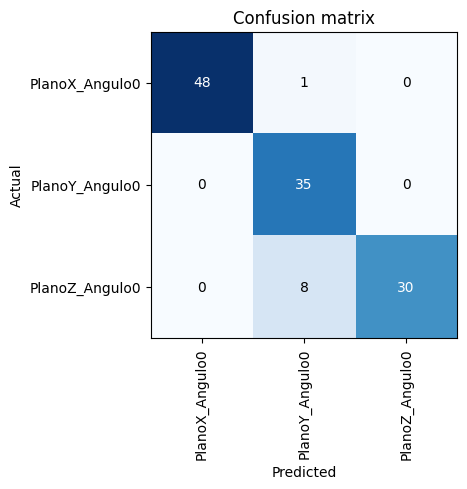

In [ ]:
# | export
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

CPU times: user 168 ms, sys: 57.8 ms, total: 225 ms
Wall time: 285 ms


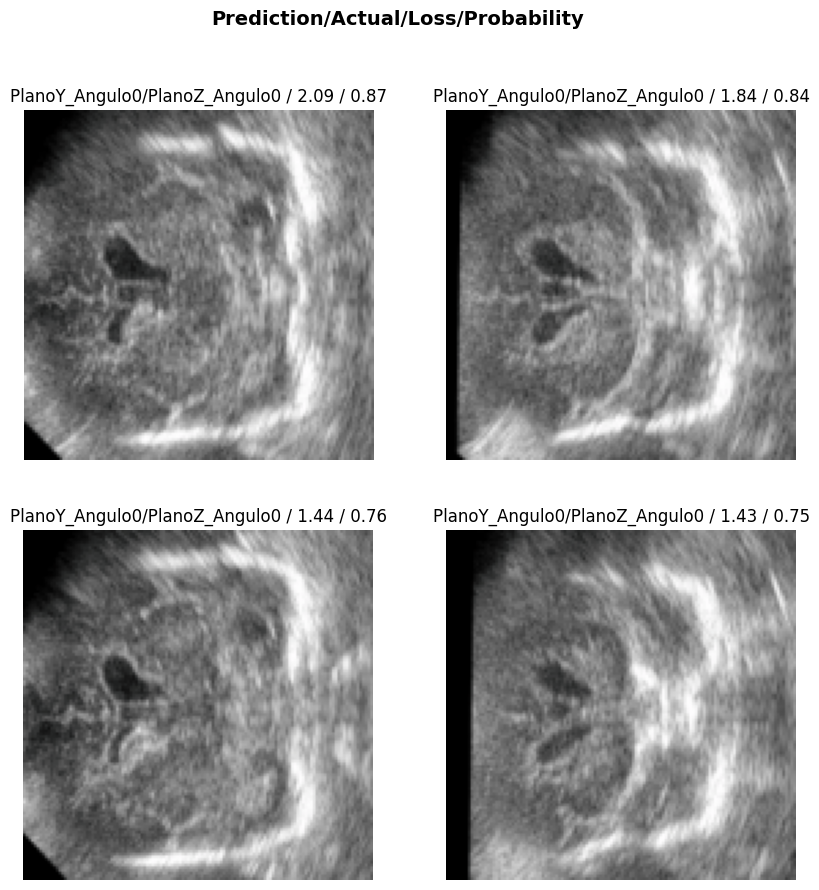

In [ ]:
# | export
interp.plot_top_losses(4,figsize=(10, 10))

In [ ]:
# | export
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
!pip install -Uqq fastai

In [ ]:
# | export
earn.export("modelo_0.pkl")

# Exportacion
Vamos a exportar las celdas que queremos como si fueran un script

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nbdev import *


InterpolationMissingOptionError: ignored

In [ ]:
learn_gen.load("gen-pre2")

NameError: ignored

In [ ]:
from pathlib import Path
name_gen = "image_gen"
path=Path('content')
path_gen = path/name_gen

In [ ]:
# shutil.rmtree(path_gen)

In [ ]:
path_gen.mkdir(exist_ok=True)

FileNotFoundError: ignored